# Schulung Ausreißererkennung - DBSCAN und Prophet

In dieser Schulung soll der Umgang mit dem DBSCAN gelernt und angewandt werden. Zusätzlich kann der Prophet Algorithmus beispielhaft benutzt werden.

### 1. DBSCAN

In dem vorliegenden Datensatz sind verschiedene Fischarten mit deren Gewicht (in Gramm), Größe (in cm) und Lebensraum aufgelistet. Ziel der Übung ist es die Fische zu erkennen, die untypische Merkmale aufweisen.
Dies soll mit Hilfe des DBSCANs realisiert werden. Untypische Datensätze (Ausreißer) können dann näher betrachtet werden und sofern notwendig bearbeitet werden. (Handelt es sich um fehlerhafte Daten oder um Zufälle?)

Zuerst werden die notwendigen Standardbibliotheken importiert. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Nun soll der Datensatz Fischarten.xslx eingelesen werden (pd.read_excel) und die Spalte Index soll als Index übernommen werden.

In [3]:
df = pd.read_excel("Fischarten.xlsx", index_col="Index")
df

,Fisch,Gewicht,Gewässer,Größe
Index,,,,
1,Bullenhai,76882,Salzwasser,158
2,Wels,27723,Suesswasser,132
3,Bullenhai,66112,Salzwasser,155
4,Karpfen,41555,Suesswasser,100
5,Zander,1766,Suesswasser,65
...,...,...,...,...
151,Bullenhai,62004,Salzwasser,121
152,Forelle,8162,Suesswasser,42
153,Karpfen,39862,Suesswasser,63


Der eingelesene Datensatz soll um seine vorerst nicht notwendigen Spalten (Fisch und Gewässer) gekürzt werden und unter neuem Namen abgespeichert werden.

In [4]:
df_neu = df.drop(columns=['Fisch', 'Gewässer'], axis = 1)
df_neu

,Gewicht,Größe
Index,,
1,76882,158
2,27723,132
3,66112,155
4,41555,100
5,1766,65
...,...,...
151,62004,121
152,8162,42
153,39862,63


Da der DBSCAN ein Clustering Algorithmus ist, ist es sinnvoll sich einen Überblick über die Daten zu machen. Hierfür soll ein Scatterplot für die beiden Merkmale Größe und Gewicht erstellt werden (plt.scatter). Wie viele Cluster sind zu erkennen? Sind schon Ausreißer erkennbar? Wie viele Fischarten sind im Datensatz vorhanden? (df['Fisch'].unique())

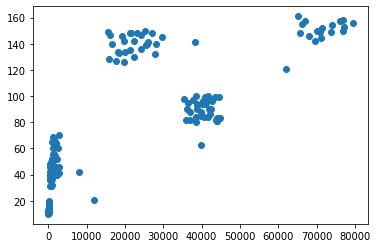

In [7]:
plt.scatter(df_neu['Gewicht'], df_neu['Größe'])

In [5]:
df['Fisch'].unique()

array(['Bullenhai', 'Wels', 'Karpfen', 'Zander', 'Forelle', 'Rotauge'],
      dtype=object)

Um einen einfacheren Umgang mit dem DBSCAN zu ermöglichen, ist es sinnvoll die Daten mit dem MinMaxScaler zu transformieren (zu Werten zwischen 0 und 1). Dieser Schritt sollte aus den Übungen bekannt sein (bei Problemen schaut nochmal in Übung 8 Fortnite Daten Clustering vorbei (8.2)). Der skalierte Dataframe soll hier df_scaled heißen.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_neu), columns = df_neu.columns, index = df_neu.index)
df_scaled.head()

#scaler = MinMaxScaler()
#d_scaled = scaler.fit_transform(df_neu)
#df_scaled = pd.DataFrame(d_scaled)
#df_scaled.head()

,Gewicht,Größe
Index,,
1,0.968433,0.980132
2,0.348701,0.807947
3,0.832659,0.960265
4,0.523077,0.596026
5,0.021469,0.364238


Der DBSCAN kann folgendermaßen importiert werden (from sklearn.cluster import DBSCAN) und mit folgendem Befehl ausgeführt werden: clustering = DBSCAN(eps=Ein Wert, min_samples=Anderer Wert).fit(df_scaled). Der Wert für eps steht für den Radius, in dem nach Nachbarn gesucht wird und min_samples steht für die Mindestanzahl an Nachbarn, die für einen Cluster benötigt wird. (Beachte: Alle Werte sind nach dem MinMaxScaler zwischen 0 und 1. eps sollte also auch zwischen 0 und 1 liegen.)

In [49]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.1, min_samples=10).fit(df_scaled)

In [50]:
pd.DataFrame(clustering.labels_).describe()

,0
count,155.000000
mean,1.922581
std,1.224933
min,-1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


Die clustering.labels_ sollen einem neuen Dataframe (df_final) hinzugefügt werden als Spalte Cluster, genauso wie die Spalte Fisch, die anfänglich entfernt wurde. Außerdem sollen die Spalten Gewicht und Größe enthalten sein. (MinMax Skaliert)

In [51]:
df_final['Cluster'] = pd.DataFrame(clustering.labels_)
df_final['Fisch'] = df['Fisch']
df_final['Gewicht'] = df_scaled['Gewicht']
df_final['Größe'] = df_scaled['Größe']

df_final.head(30)

,0,Fisch,Gewicht,Größe,Cluster
0,0,NaN,NaN,NaN,1
1,1,Bullenhai,0.968433,0.980132,0
2,0,Wels,0.348701,0.807947,1
3,2,Bullenhai,0.832659,0.960265,2
4,3,Karpfen,0.523077,0.596026,3
5,3,Zander,0.021469,0.364238,3
6,2,Forelle,0.012808,0.218543,2
7,0,Karpfen,0.513886,0.589404,1
8,0,Bullenhai,0.882052,0.927152,1
9,3,Bullenhai,0.844509,0.973510,3


Nun sollen die Cluster geplotted werden. Hierfür ist es am Einfachsten für jeden Cluster einen eigenen Dataframe zu erstellen. Ausreißer haben den Cluster-Wert -1 und werden als x dargestellt.
Sofern ihr die 5 Cluster und 5 Ausreißer gefunden habt könnt ihr den unten stehenden Code einfach ausführen.

(Um zu überprüfen ob ihr sie gefunden habt könnt ihr den Plot natürlich auch benutzen. Sofern ihr nicht 5 Cluster und 5 Ausreißer habt müsst ihr den Wert für eps beim DBSCAN noch anpassen.)

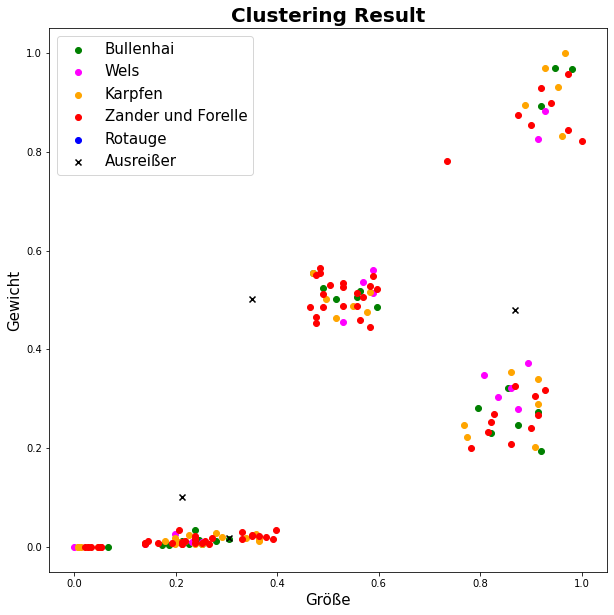

In [52]:
plt.figure(figsize=(10,10))
df1 = df_final[df_final.Cluster==0]
df2 = df_final[df_final.Cluster==1]
df3 = df_final[df_final.Cluster==2]
df4 = df_final[df_final.Cluster==3]
df5 = df_final[df_final.Cluster==4]
df6 = df_final[df_final.Cluster==-1]
plt.scatter(df1["Größe"],df1["Gewicht"],color='green', label='Bullenhai')
plt.scatter(df2["Größe"],df2["Gewicht"],color='magenta', label='Wels')
plt.scatter(df3["Größe"],df3["Gewicht"],color='orange', label='Karpfen')
plt.scatter(df4["Größe"],df4["Gewicht"],color='red', label='Zander und Forelle')
plt.scatter(df5["Größe"],df5["Gewicht"],color='blue', label='Rotauge')
plt.scatter(df6["Größe"],df6["Gewicht"],color='black', marker="x", label="Ausreißer")
plt.title('Clustering Result', fontweight='bold',fontsize=20)
plt.xlabel('Größe',fontsize=15)
plt.ylabel('Gewicht',fontsize=15)
plt.legend(fontsize=15)
plt.show()

### 2. Prophet

Sofern die obige Übung vollständig erledigt ist, könnt ihr hier einmal ein Beispiel für den prophet Algorithmus von Facebook sehen und versuchen nachzuvollziehen.

Zuerst müssen dafür 2 Pakete installiert werden. Prophet kann nur installiert werden, wenn C++ Version 14.0 vorhanden ist. (Sofern ihr Visual Studio Code installiert habt sollte es kein Problem geben)

Falls ihr das nicht installiert habt bzw. es eine Fehlermeldung gibt. Könnt ihr das Notebook auch in Google colab ausführen.
(https://colab.research.google.com/)

##### Achtung! Bitte nur ausführen sofern Anaconda mindestens 4Gb Arbeitsspeicher zur Verfügung stehen! 
Es Werden 4Gb Arbeitsspeicher für die Installation benötigt und 2Gb zum Ausführen.

In [ ]:
!pip install pystan==2.19.1.1

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

Der Prophet Algorithmus soll hier auf den DAX seit 1998 angewandt werden. Der Algorithmus wird mit den gewählten Einstellungen eine Trendlinie berechnen, eine Prognose für die nächsten 750 Handelstage erstellen und uncertainty intervals berechnen. 
Werte außerhalb der uncertainty intervals gelten als Ausreißer.

In [ ]:
df_dax = pd.read_excel('Dax_ab98.xlsx')

In [ ]:
m = Prophet()
m.fit(df_dax)
future = m.make_future_dataframe(periods=750)
forecast = m.predict(future)
fig = m.plot(forecast)

Mit den Standardeinstellungen fällt auf, dass der Einfluss der Coronakrise anfang 2020 hier als Ausreißer erkannt wird. 

Wenn ihr hiermit fertig seit, meldet euch gerne im Chat, damit wir euch den Link zum Quiz zu Verfügung stellen können.

## Vielen Dank für die Mitarbeit!